Serious environmental hazards include wildfires, which often badly hit the economy, environment, and human beings. Estimating the Fire size would help in minimizing damages.
This project makes use of regression models for predicting the fire size based on the historical data available for wildfires.


In [ ]:
import pandas as pd

dataset = pd.read_csv('cleaned_wildfire_dataset.csv')

target_column = 'FIRE_SIZE'

# creating diff columns for categorical and numerical values
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns


<ipython-input-1-29674128dd26>:3: DtypeWarning: Columns (7,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('cleaned_wildfire_dataset.csv')


In [ ]:
dataset.head()

,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,...,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_SEASON,FIRE_DURATION
0,1,1,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,PNF-47,...,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County,2.0,Winter,0.0
1,2,2,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,...,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County,5.0,Spring,0.0
2,3,3,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,021,...,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County,5.0,Spring,0.0
3,4,4,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,6,...,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County,6.0,Summer,5.0
4,5,5,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,7,...,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County,6.0,Summer,5.0


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

dataset[numerical_columns] = imputer_num.fit_transform(dataset[numerical_columns])
dataset[categorical_columns] = imputer_cat.fit_transform(dataset[categorical_columns])

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
label_encoders = {}
for col in categorical_columns:
    dataset[col] = dataset[col].astype(str)  # Convert all categorical columns to strings
    label_encoders[col] = LabelEncoder()
    dataset[col] = label_encoders[col].fit_transform(dataset[col])


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
dataset.head()

,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_SEASON,FIRE_DURATION
0,1.0,1.0,0,0,0,21,81,188,93,8524,8134,17031,148,1110,206,2005.0,3126,33.0,1300.0,0,9,1,3131,33.0,1730.0,0.10,0,40.036944,-121.005833,3,4,114,6063.0,364,2.0,3,0.0
1,2.0,2.0,0,0,0,14,29,180,34,2263,6347,32815,148,1110,206,2004.0,3076,133.0,845.0,1,7,1,3083,133.0,1530.0,0.25,0,38.933056,-120.404444,3,4,113,6061.0,362,5.0,1,0.0
2,3.0,3.0,0,0,0,14,29,180,34,428,6338,38609,148,1110,206,2004.0,3078,152.0,1921.0,0,1,1,3085,152.0,2024.0,0.10,0,38.984167,-120.735556,2,4,42,6017.0,141,5.0,1,0.0
3,4.0,4.0,0,0,0,14,29,180,34,3729,3,13458,148,1110,206,2004.0,3084,180.0,1600.0,1,7,1,3093,185.0,1400.0,0.10,0,38.559167,-119.913333,3,4,83,6003.0,13,6.0,2,5.0
4,5.0,5.0,0,0,0,14,29,180,34,3994,3,40380,148,1110,206,2004.0,3084,180.0,1600.0,1,7,1,3093,185.0,1200.0,0.10,0,38.559167,-119.933056,3,4,83,6003.0,13,6.0,2,5.0



Correlation Matrix


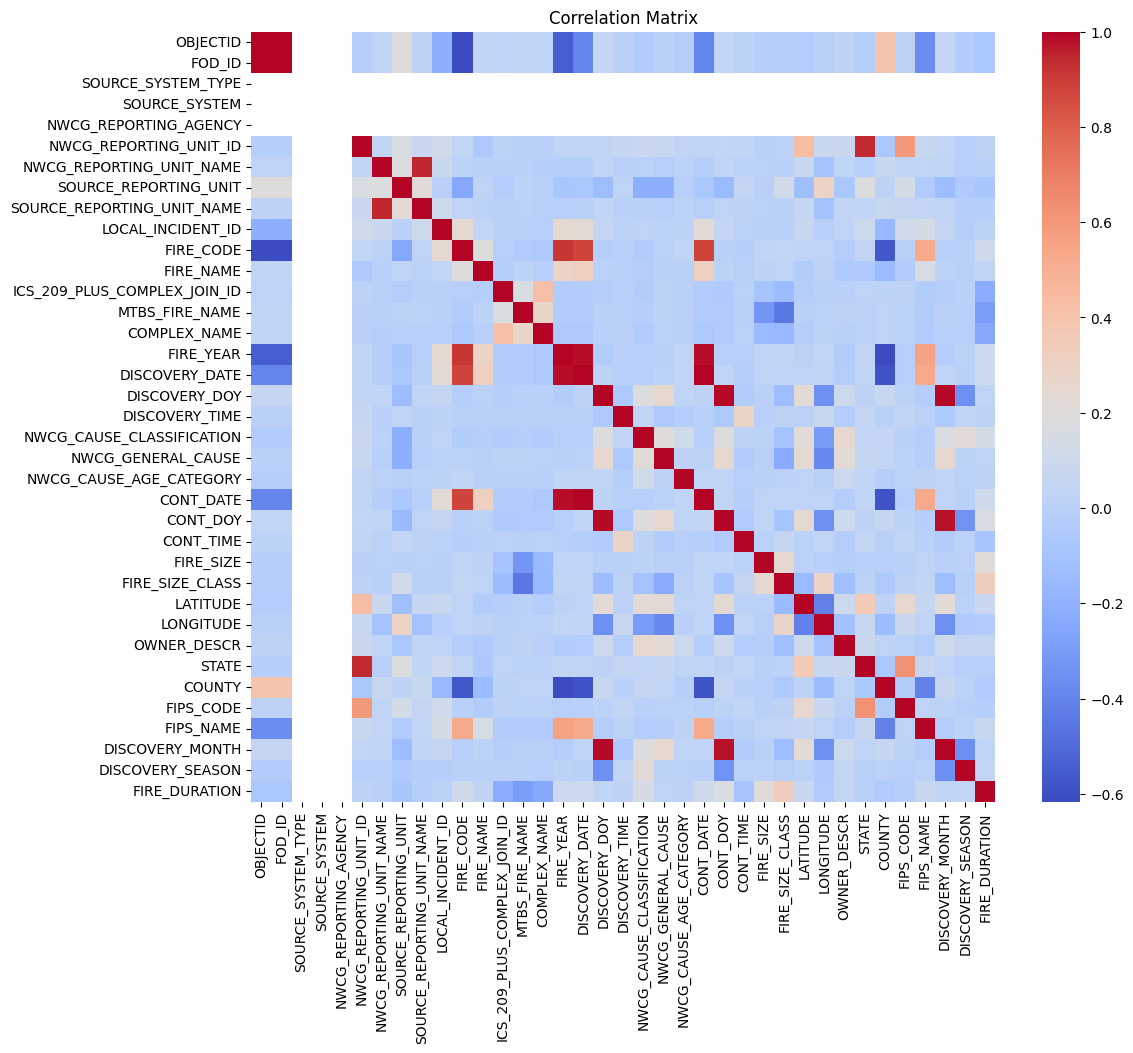

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nCorrelation Matrix")
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset[numerical_columns])
dataset[numerical_columns] = scaled_features


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=[target_column])  # Features
y = dataset[target_column]                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import torch

if torch.cuda.is_available():
    print("CUDA is available. Running on GPU:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Running on CPU.")


CUDA is available. Running on GPU: Tesla T4


**Random Forest Regressor**

Random Forest Regressor handles non-linear interactions better and ranks feature importance.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42, n_estimators=50, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

Evaluation Metrics for Random Forest Regression:
Mean Absolute Error (MAE): 0.0351
Mean Squared Error (MSE): 1.3036
Root Mean Squared Error (RMSE): 1.1418
R^2 Score: 0.2576
----------------------------------------



Feature Importances (Random Forest):
                         Feature  Importance
25               FIRE_SIZE_CLASS    0.381584
13                MTBS_FIRE_NAME    0.090270
16                DISCOVERY_DATE    0.037971
23                      CONT_DOY    0.037176
11                     FIRE_NAME    0.035509
27                     LONGITUDE    0.030731
14                  COMPLEX_NAME    0.029369
32                     FIPS_NAME    0.028691
17                 DISCOVERY_DOY    0.028343
22                     CONT_DATE    0.026692
6       NWCG_REPORTING_UNIT_NAME    0.026474
35                 FIRE_DURATION    0.026246
18                DISCOVERY_TIME    0.022689
0                       OBJECTID    0.017492
9              LOCAL_INCIDENT_ID    0.017366
26                      LATITUDE    0.016949
8     SOURCE_REPORTING_UNIT_NAME    0.015605
24                     CONT_TIME    0.015223
1                         FOD_ID    0.015114
31                     FIPS_CODE    0.014819
7          SOURCE

<ipython-input-28-2fbf63bc1a6d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


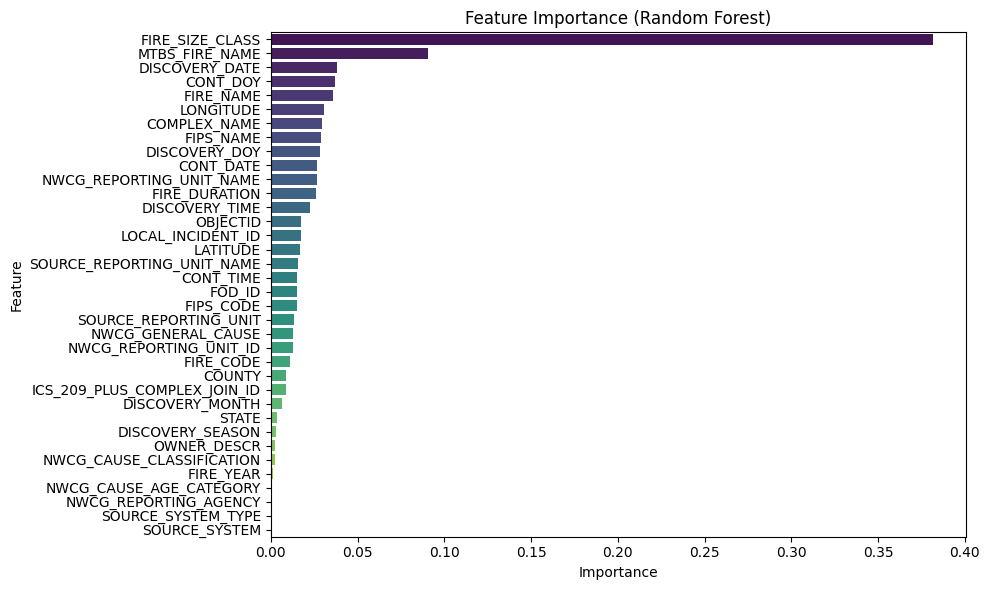

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):")
print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

**Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)

gb_model.fit(X_train, y_train)

gb_preds = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, gb_preds)
mse_gb = mean_squared_error(y_test, gb_preds)
rmse_gb = mean_squared_error(y_test, gb_preds, squared=False)
r2_gb = r2_score(y_test, gb_preds)

print("Gradient Boosting Regression:")
print(f"MAE: {mae_gb:.4f}")
print(f"MSE: {mse_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")


Gradient Boosting Regression:
MAE: 0.0352
MSE: 1.2233
RMSE: 1.1060
R² Score: 0.3033


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


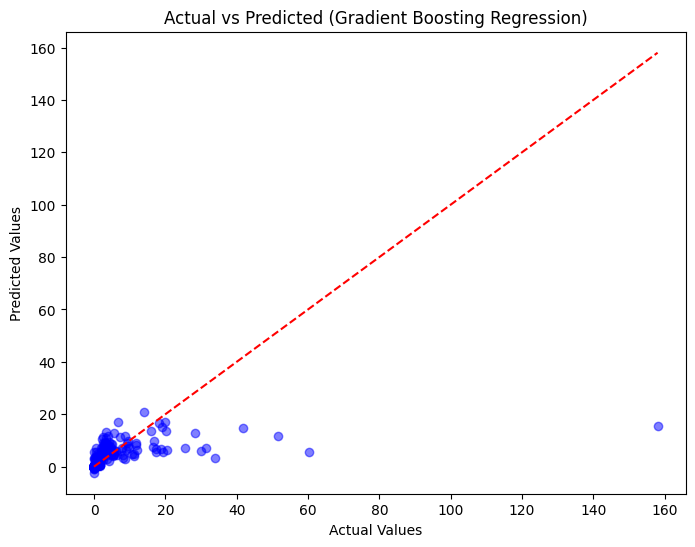


Feature Importances (Gradient Boosting):
                         Feature  Importance
25               FIRE_SIZE_CLASS    0.384978
13                MTBS_FIRE_NAME    0.085994
27                     LONGITUDE    0.063535
11                     FIRE_NAME    0.059964
35                 FIRE_DURATION    0.048879
32                     FIPS_NAME    0.036983
24                     CONT_TIME    0.032177
23                      CONT_DOY    0.024915
9              LOCAL_INCIDENT_ID    0.022055
6       NWCG_REPORTING_UNIT_NAME    0.021322
14                  COMPLEX_NAME    0.017125
18                DISCOVERY_TIME    0.016935
16                DISCOVERY_DATE    0.016631
26                      LATITUDE    0.015893
20            NWCG_GENERAL_CAUSE    0.015795
31                     FIPS_CODE    0.015297
30                        COUNTY    0.014532
0                       OBJECTID    0.013121
22                     CONT_DATE    0.013018
8     SOURCE_REPORTING_UNIT_NAME    0.011447
5         NWC

<ipython-input-14-838919a6e195>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances_gb, x='Importance', y='Feature', palette='viridis')


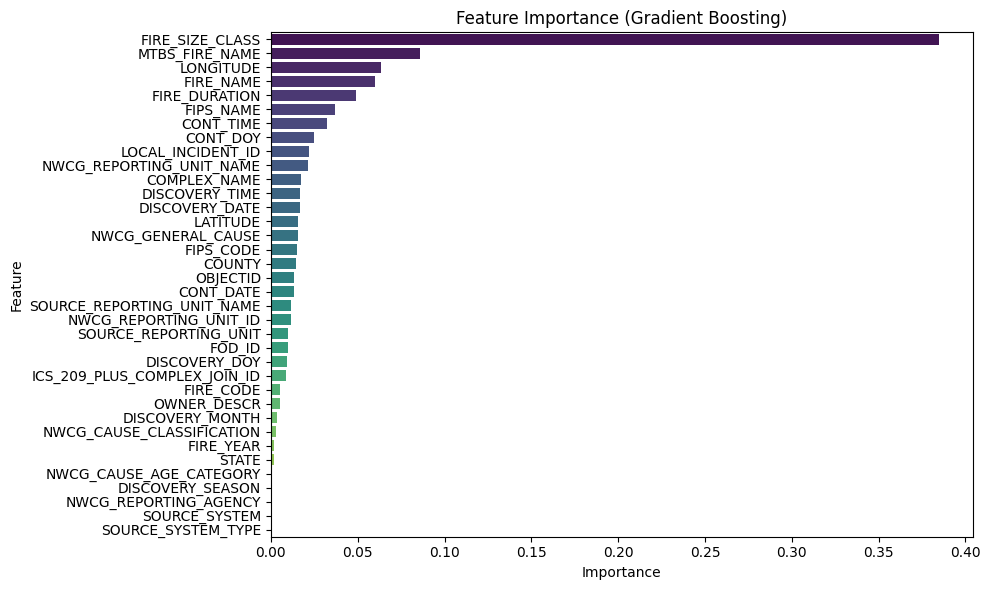

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted (Gradient Boosting Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

feature_importances_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Gradient Boosting):")
print(feature_importances_gb)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances_gb, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Gradient Boosting)')
plt.tight_layout()
plt.show()

**XGBoost Regression**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, max_depth=5, random_state=42, tree_method='gpu_hist')  # Use 'gpu_hist' for GPU acceleration

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, xgb_preds)
mse_xgb = mean_squared_error(y_test, xgb_preds)
rmse_xgb = mean_squared_error(y_test, xgb_preds, squared=False)
r2_xgb = r2_score(y_test, xgb_preds)

print("XGBoost Regression:")
print(f"MAE: {mae_xgb:.4f}")
print(f"MSE: {mse_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:37:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBoost Regression:
MAE: 0.0414
MSE: 1.3521
RMSE: 1.1628
R² Score: 0.2300


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:37:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:37:19] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is depr

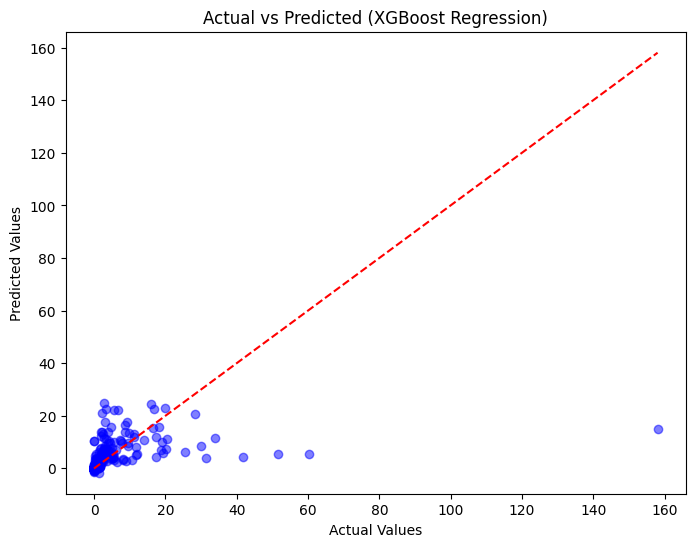


Feature Importances (XGBoost):
                         Feature  Importance
25               FIRE_SIZE_CLASS    0.161949
23                      CONT_DOY    0.104878
32                     FIPS_NAME    0.060369
10                     FIRE_CODE    0.057730
17                 DISCOVERY_DOY    0.049895
8     SOURCE_REPORTING_UNIT_NAME    0.049481
7          SOURCE_REPORTING_UNIT    0.040086
16                DISCOVERY_DATE    0.036991
24                     CONT_TIME    0.036813
22                     CONT_DATE    0.036779
20            NWCG_GENERAL_CAUSE    0.035707
27                     LONGITUDE    0.030170
18                DISCOVERY_TIME    0.030071
11                     FIRE_NAME    0.029181
13                MTBS_FIRE_NAME    0.028295
6       NWCG_REPORTING_UNIT_NAME    0.026537
5         NWCG_REPORTING_UNIT_ID    0.024549
29                         STATE    0.023952
26                      LATITUDE    0.022557
35                 FIRE_DURATION    0.017691
12  ICS_209_PLUS_COMPLE

<ipython-input-16-056fb6e65894>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances_xgb, x='Importance', y='Feature', palette='viridis')


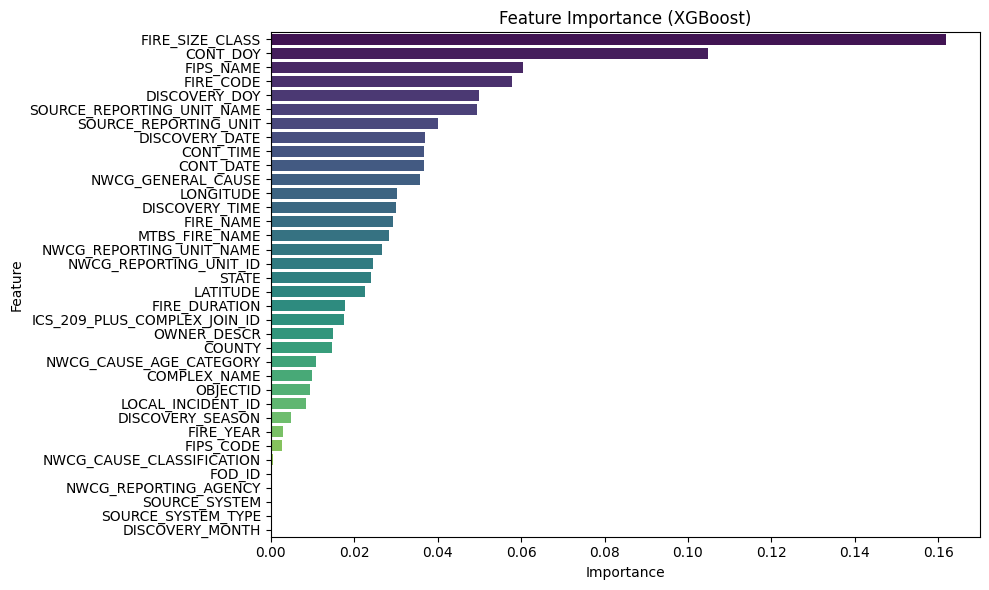

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted (XGBoost Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

feature_importances_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (XGBoost):")
print(feature_importances_xgb)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances_xgb, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()

**Support Vector Regression (SVR)**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the SVR model with an RBF (Radial Basis Function) kernel
svr_model = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.1)

svr_model.fit(X_train, y_train)

svr_preds = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, svr_preds)
mse_svr = mean_squared_error(y_test, svr_preds)
rmse_svr = mean_squared_error(y_test, svr_preds, squared=False)
r2_svr = r2_score(y_test, svr_preds)

print("Support Vector Regression:")
print(f"MAE: {mae_svr:.4f}")
print(f"MSE: {mse_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")
print(f"R² Score: {r2_svr:.4f}")


Support Vector Regression:
MAE: 0.1778
MSE: 1.7626
RMSE: 1.3276
R² Score: -0.0038


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


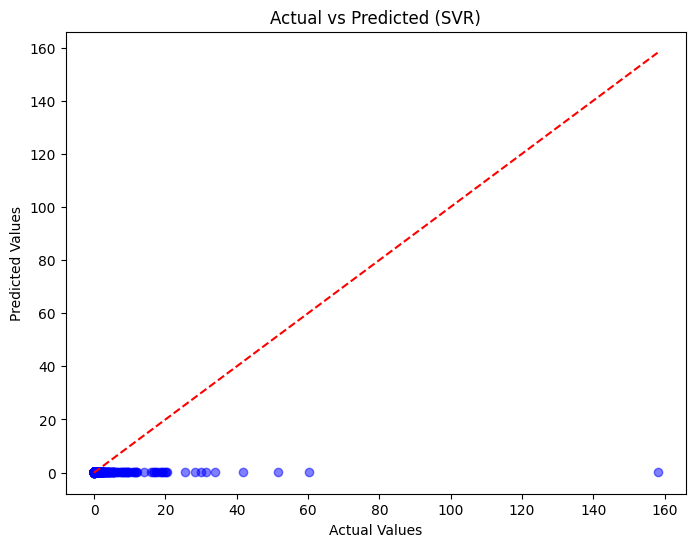

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted (SVR)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

**K-Nearest Neighbors Regression (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

knn_preds = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, knn_preds)
mse_knn = mean_squared_error(y_test, knn_preds)
rmse_knn = mean_squared_error(y_test, knn_preds, squared=False)
r2_knn = r2_score(y_test, knn_preds)

print("K-Nearest Neighbors Regression:")
print(f"MAE: {mae_knn:.4f}")
print(f"MSE: {mse_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")
print(f"R² Score: {r2_knn:.4f}")


K-Nearest Neighbors Regression:
MAE: 0.0612
MSE: 1.7821
RMSE: 1.3349
R² Score: -0.0149


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


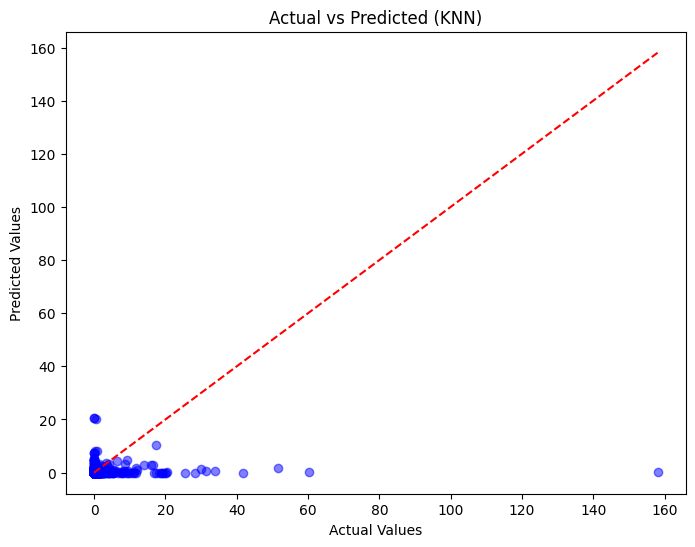

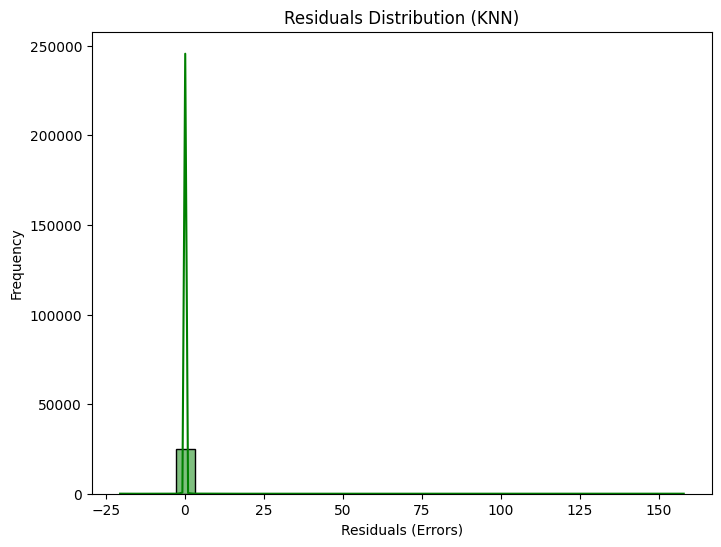

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted (KNN)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

residuals = y_test - knn_preds

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title("Residuals Distribution (KNN)")
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.show()

**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)

dt_model.fit(X_train, y_train)

dt_preds = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, dt_preds)
mse_dt = mean_squared_error(y_test, dt_preds)
rmse_dt = mean_squared_error(y_test, dt_preds, squared=False)
r2_dt = r2_score(y_test, dt_preds)

print("Decision Tree Regression:")
print(f"MAE: {mae_dt:.4f}")
print(f"MSE: {mse_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}")

Decision Tree Regression:
MAE: 0.0365
MSE: 1.4205
RMSE: 1.1919
R² Score: 0.1910


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


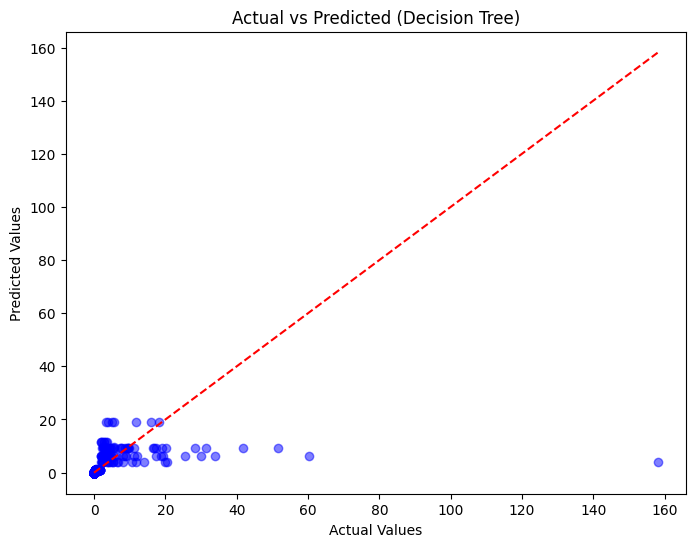

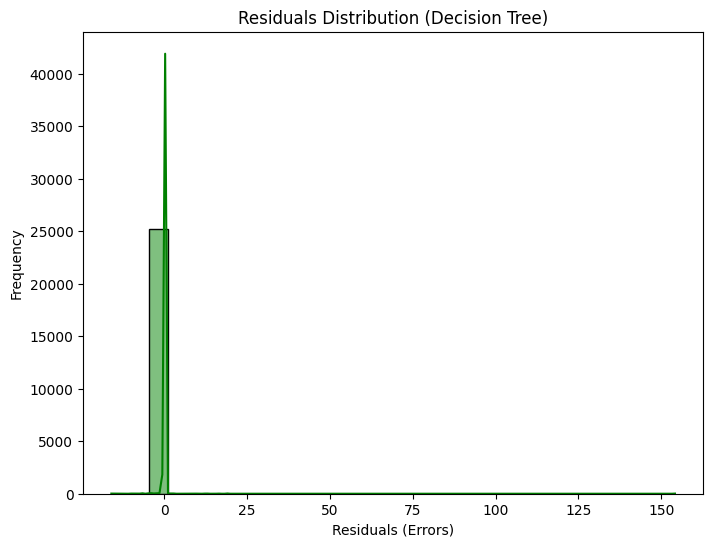

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted (Decision Tree)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

residuals = y_test - dt_preds

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title("Residuals Distribution (Decision Tree)")
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.show()

**Neural Networks**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 26803.7793 - val_loss: 1.0780
Epoch 2/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7469 - val_loss: 0.9685
Epoch 3/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6057 - val_loss: 1.0323
Epoch 4/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5509 - val_loss: 0.9554
Epoch 5/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6516 - val_loss: 0.9564
Epoch 6/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6450 - val_loss: 0.9542
Epoch 7/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6579 - val_loss: 0.9542
Epoch 8/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7434 - val_loss: 0.9541
Epoch 9/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6723 - val_loss: 0.9542
Epoch 10/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6533 - val_loss: 0.9541
Epoch 11/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4484 - val_loss: 0.9560
Epoch 12/100
12

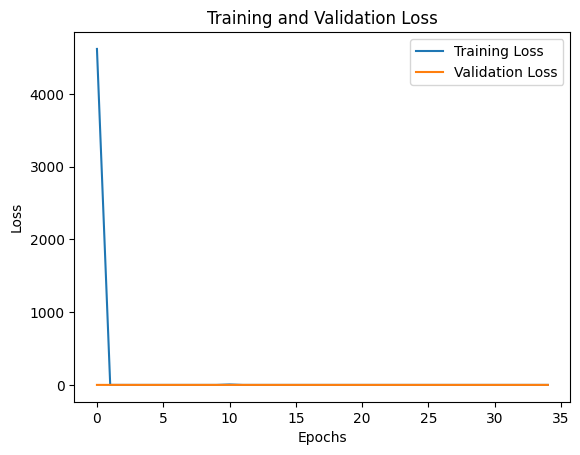

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True,
                               verbose=1)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping])


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

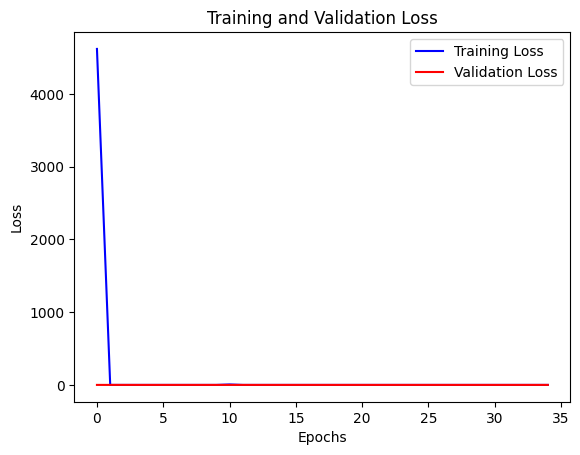

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
